In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
# Load the IMDb dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cuts off reviews after 500 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Pad sequences to a fixed length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
x_train.shape

(25000, 500)

In [6]:
x_test.shape

(25000, 500)

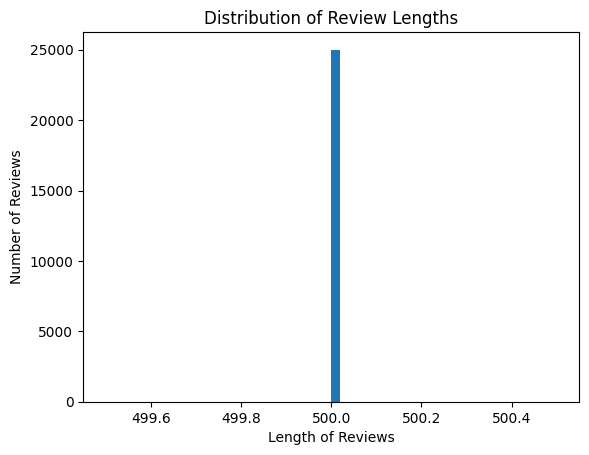

In [7]:
# Visualize the length of reviews in the dataset
plt.hist([len(review) for review in x_train], bins=50)
plt.xlabel('Length of Reviews')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

In [8]:
# Build the Recurrent Neural Network (RNN) model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 35s 206ms/step - loss: 0.6021 - accuracy: 0.6733 - val_loss: 0.4507 - val_accuracy: 0.8054
Epoch 2/5
157/157 [==============================] - 31s 198ms/step - loss: 0.3548 - accuracy: 0.8529 - val_loss: 0.3627 - val_accuracy: 0.8466
Epoch 3/5
157/157 [==============================] - 33s 212ms/step - loss: 0.2376 - accuracy: 0.9086 - val_loss: 0.3511 - val_accuracy: 0.8486
Epoch 4/5
157/157 [==============================] - 28s 181ms/step - loss: 0.1772 - accuracy: 0.9348 - val_loss: 0.3648 - val_accuracy: 0.8514
Epoch 5/5
157/157 [==============================] - 29s 184ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.4177 - val_accuracy: 0.8562


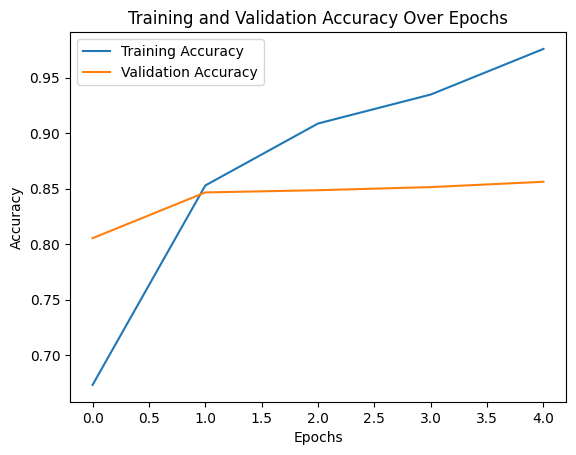

In [12]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

782/782 [==============================] - 23s 29ms/step - loss: 0.4444 - accuracy: 0.8452
Test accuracy: 0.8452


In [14]:
# Predictions on sample reviews
sample_reviews = x_test[:5]
predictions = model.predict(sample_reviews)
predicted_sentiments = ['Positive' if pred > 0.5 else 'Negative' for pred in predictions]

1/1 [==============================] - 0s 213ms/step


In [15]:
# Display predictions
for i, review in enumerate(sample_reviews):
    print(f"Review {i+1}:")
    print(f"Predicted Sentiment: {predicted_sentiments[i]}")
    print(f"True Sentiment: {'Positive' if y_test[i] == 1 else 'Negative'}")
    print("-" * 50)


Review 1:
Predicted Sentiment: Negative
True Sentiment: Negative
--------------------------------------------------
Review 2:
Predicted Sentiment: Positive
True Sentiment: Positive
--------------------------------------------------
Review 3:
Predicted Sentiment: Positive
True Sentiment: Positive
--------------------------------------------------
Review 4:
Predicted Sentiment: Negative
True Sentiment: Negative
--------------------------------------------------
Review 5:
Predicted Sentiment: Positive
True Sentiment: Positive
--------------------------------------------------
